In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


# Step 1: Data Acquisition and Preliminary Exploration

In [11]:


# Load the dataset (update the file path as necessary)
data_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Employee-Attrition.csv'
df = pd.read_csv(data_path)

# Display basic information and summary statistics
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [12]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

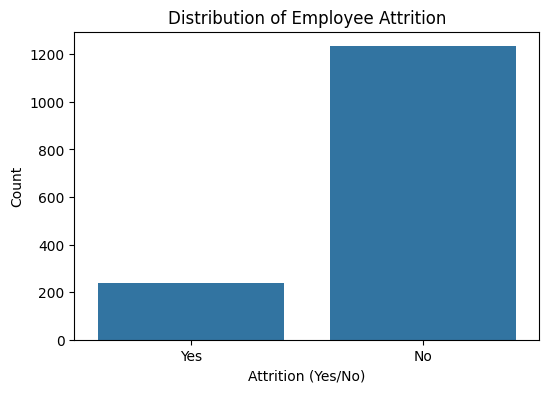

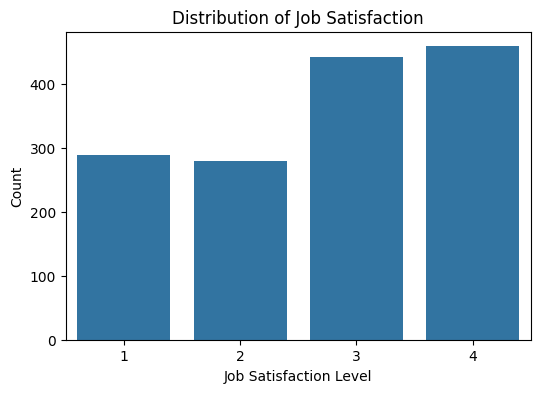

In [4]:

# Visualize the distribution of the target variable 'Attrition'
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title("Distribution of Employee Attrition")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Count")
plt.show()

# Visualize the distribution of Job Satisfaction
plt.figure(figsize=(6, 4))
sns.countplot(x='JobSatisfaction', data=df)
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count")
plt.show()

# Convert the 'Attrition' column to a binary variable: Yes -> 1, No -> 0
df['Attrition_Flag'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


# Step 2: Model Development


In [5]:


# Feature selection: choose variables likely to influence attrition.
# Example features: Age, MonthlyIncome, JobSatisfaction, and YearsAtCompany.
selected_features = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany']

# Define predictor variables (X) and target variable (y)
X = df[selected_features]
y = df['Attrition_Flag']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# 3. Practical Application and Evaluation


Model Performance Metrics:
Accuracy: 0.8616780045351474
Confusion Matrix:
 [[380   0]
 [ 61   0]]
ROC AUC Score: 0.6589301121656601


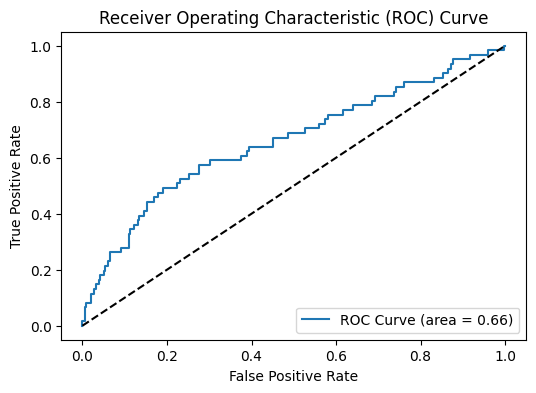

Model Coefficients:
           Feature  Coefficient
1    MonthlyIncome    -0.000065
0              Age    -0.033890
3   YearsAtCompany    -0.054579
2  JobSatisfaction    -0.250725


In [6]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of attrition

# Evaluate model performance using accuracy, confusion matrix, and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Model Performance Metrics:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Display model coefficients with corresponding feature names to interpret odds ratios
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_[0]
})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print("Model Coefficients:")
print(coef_df)